# Final Project

**Joshua Salmon**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

from sklearn.ensemble import VotingClassifier

cv = 5

# Load and Process the Iris data

In [2]:
iris_main = pd.read_csv('iris_flowers.csv')
iris_main = iris_main.sample(frac=1, random_state=1)
iris_main.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
14,4.8,3.1,1.6,0.2,setosa
98,6.5,3.0,5.2,2.0,virginica
75,7.0,3.2,4.7,1.4,versicolor
16,6.9,3.1,5.1,2.3,virginica
131,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor
141,5.5,2.4,3.7,1.0,versicolor
44,4.9,2.4,3.3,1.0,versicolor
29,6.7,3.0,5.2,2.3,virginica
120,5.0,2.0,3.5,1.0,versicolor


### Proportion of each feature

In [3]:
proportions = iris_main['species'].value_counts(normalize=True).to_frame()
proportions

,species
setosa,0.333333
virginica,0.333333
versicolor,0.333333


### Null features

In [4]:
iris_main.isnull().sum().to_frame().T

,sepal_length,sepal_width,petal_length,petal_width,species
0,0,0,0,0,0


### Unique features

In [5]:
iris_main.nunique().to_frame().T

,sepal_length,sepal_width,petal_length,petal_width,species
0,35,23,43,22,3


### Seaborn Pairplot

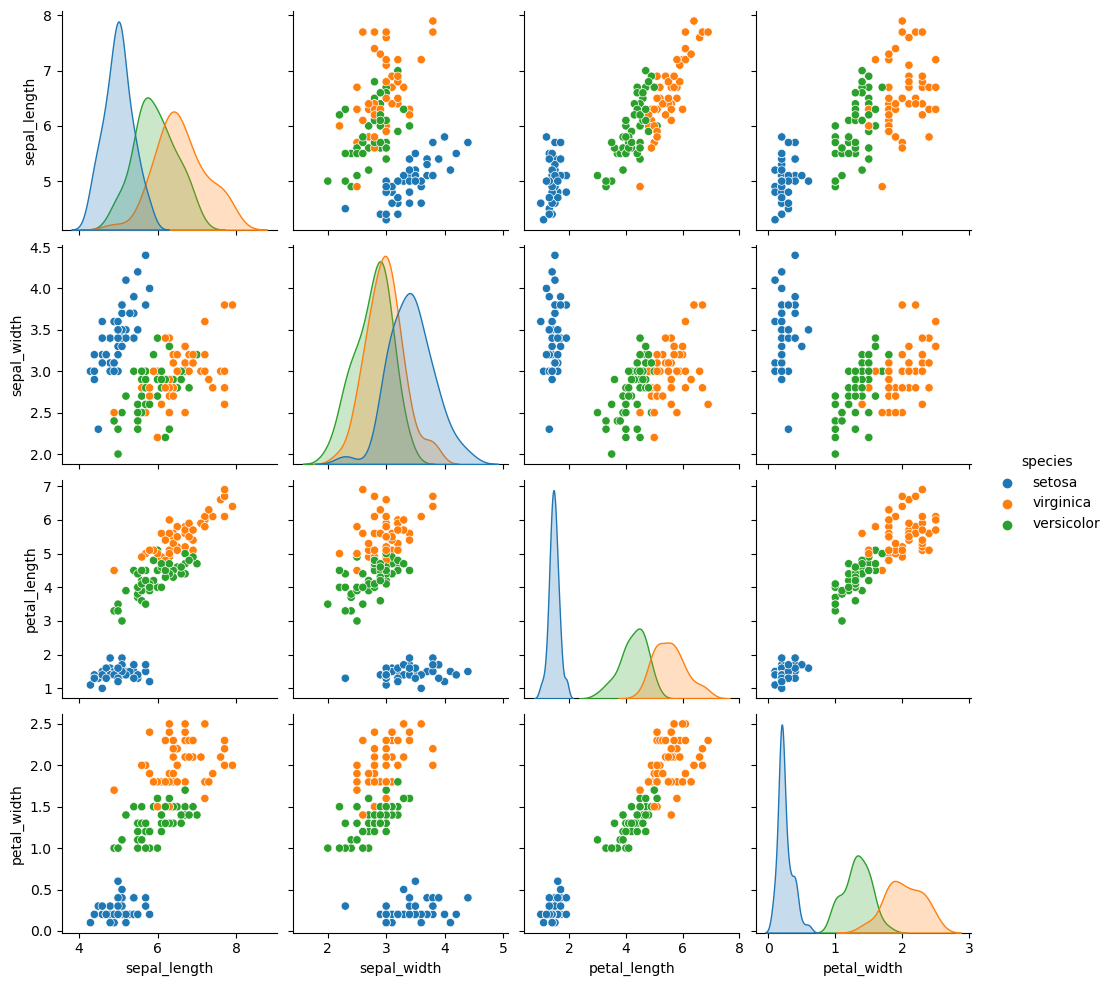

In [6]:
sns.pairplot(iris_main, hue="species")
plt.show()

# Preprocessing

In [7]:
x = iris_main.iloc[:,:4].values
y = iris_main.species.values
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

def preprocessing(x, y):    
    x_features = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    x_features.fit(x_train_raw)
    x_train = x_features.transform(x_train_raw)
    x_test = x_features.transform(x_test_raw)
    

    return x_train, y_train, x_test, y_test;

# Data sets

In [8]:
# DS1 - Main data set
iris_DF1 = iris_main.copy()

x_DF1 = iris_DF1.iloc[:,:4].values
y_DF1 = iris_DF1.species.values

iris_DF1.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
14,4.8,3.1,1.6,0.2,setosa
98,6.5,3.0,5.2,2.0,virginica
75,7.0,3.2,4.7,1.4,versicolor
16,6.9,3.1,5.1,2.3,virginica
131,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor
141,5.5,2.4,3.7,1.0,versicolor
44,4.9,2.4,3.3,1.0,versicolor
29,6.7,3.0,5.2,2.3,virginica
120,5.0,2.0,3.5,1.0,versicolor


In [9]:
# DS2 - Removes sepal_length due to pairplot evalutation
iris_DF2 = iris_main[['sepal_width', 'petal_width','petal_length','species']]
iris_DF2 = iris_DF2.sample(frac=1, random_state=1)

x_DF2 = iris_DF2.iloc[:,:3].values
y_DF2 = iris_DF2.species.values

iris_DF2.head(10)

,sepal_width,petal_width,petal_length,species
78,3.0,2.1,6.6,virginica
109,2.3,1.3,4.0,versicolor
74,4.4,0.4,1.5,setosa
92,2.8,1.9,6.1,virginica
61,3.8,0.3,1.5,setosa
126,3.0,1.7,5.0,versicolor
134,3.4,0.4,1.6,setosa
58,2.8,1.2,4.7,versicolor
146,2.7,1.4,3.9,versicolor
47,3.0,1.6,5.8,virginica


In [10]:
# DS3 - Takes the log of all features but removes sepal_length completely. 
iris_DF3 = iris_main.copy()

iris_DF3['log_sepal_width'] = np.log(iris_DF3.sepal_width).round(4)
iris_DF3['log_petal_length'] = np.log(iris_DF3.petal_length).round(4)
iris_DF3['log_petal_width'] = np.log(iris_DF3.petal_width).round(4)
iris_DF3 = iris_DF3[['log_sepal_width','log_petal_length','log_petal_width','species']]

x_DF3 = iris_DF3.iloc[:,:3].values
y_DF3 = iris_DF3.species.values

iris_DF3.head(10)

,log_sepal_width,log_petal_length,log_petal_width,species
14,1.1314,0.4700,-1.6094,setosa
98,1.0986,1.6487,0.6931,virginica
75,1.1632,1.5476,0.3365,versicolor
16,1.1314,1.6292,0.8329,virginica
131,1.0296,1.5261,0.4055,versicolor
56,1.0296,1.5041,0.2624,versicolor
141,0.8755,1.3083,0.0000,versicolor
44,0.8755,1.1939,0.0000,versicolor
29,1.0986,1.6487,0.8329,virginica
120,0.6931,1.2528,0.0000,versicolor


# K-Nearest Neighbors

### KNN Model 1

In [23]:
x_train, y_train, _, _ = preprocessing(x_DF1, y_DF1)

In [24]:
knn_clf1 = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [1, 2, 3, 4, 5]
}

knn_grid1 = GridSearchCV(knn_clf1, knn_parameters, cv=cv, refit='True', n_jobs=-1)
knn_grid1.fit(x_train, y_train)

knn_mod1 = knn_grid1.best_estimator_

print(f'Best Parameters: {knn_grid1.best_params_}')
print(f'Best CV Score:   {round(knn_grid1.best_score_*100,2)}%')

Best Parameters: {'n_neighbors': 3}
Best CV Score:   95.83%


In [25]:
cv_pred = cross_val_predict(knn_mod1, x_train, y_train, cv=cv)
cm_knn_mod1 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_knn_mod1_df = pd.DataFrame(cm_knn_mod1, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_knn_mod1 = classification_report(y_train, cv_pred)

print(cm_knn_mod1_df,'\n')
print(cr_knn_mod1)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          36          4
virginica        0           1         39 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.97      0.94        40
   virginica       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### KNN Model 2

In [26]:
x_train, y_train, _, _ = preprocessing(x_DF2, y_DF2)

In [27]:
knn_clf2 = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [1, 2, 3, 4, 5]
}

knn_grid2 = GridSearchCV(knn_clf2, knn_parameters, cv=cv, refit='True', n_jobs=-1)
knn_grid2.fit(x_train, y_train)

knn_mod2 = knn_grid2.best_estimator_

print(f'Best Parameters: {knn_grid2.best_params_}')
print(f'Best CV Score:   {round(knn_grid2.best_score_*100,2)}%')

Best Parameters: {'n_neighbors': 3}
Best CV Score:   95.83%


In [28]:
cv_pred = cross_val_predict(knn_mod2, x_train, y_train, cv=cv)
cm_knn_mod2 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_knn_mod2_df = pd.DataFrame(cm_knn_mod2, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_knn_mod2 = classification_report(y_train, cv_pred)

print(cm_knn_mod2_df,'\n')
print(cr_knn_mod2)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          36          4
virginica        0           1         39 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.97      0.94        40
   virginica       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### KNN Model 3

In [29]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)

In [30]:
knn_clf3 = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [1, 2, 3, 4, 5]
}

knn_grid3 = GridSearchCV(knn_clf3, knn_parameters, cv=cv, refit='True', n_jobs=-1)
knn_grid3.fit(x_train, y_train)

knn_mod3 = knn_grid3.best_estimator_

print(f'Best Parameters: {knn_grid3.best_params_}')
print(f'Best CV Score:   {round(knn_grid3.best_score_*100,2)}%')

Best Parameters: {'n_neighbors': 3}
Best CV Score:   95.83%


In [31]:
cv_pred = cross_val_predict(knn_mod3, x_train, y_train, cv=cv)
cm_knn_mod3 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_knn_mod3_df = pd.DataFrame(cm_knn_mod3, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_knn_mod3 = classification_report(y_train, cv_pred)

print(cm_knn_mod3_df,'\n')
print(cr_knn_mod3)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          36          4
virginica        0           1         39 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.97      0.94        40
   virginica       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Final KNN Model

In [32]:
x_train, y_train, _, _ = preprocessing(x_DF1, y_DF1)
knn_mod = KNeighborsClassifier(n_neighbors=3)# All three data sets say 3 is the best parameter.
knn_mod.fit(x_train, y_train)

knn_cv_score = cross_val_score(knn_mod, x_train, y_train, cv=cv, n_jobs=-1).mean().round(4)
print(f'KNN Cross-Validation-Score: {knn_cv_score*100}%')

KNN Cross-Validation-Score: 95.83%


In [33]:
cv_pred = cross_val_predict(knn_mod, x_train, y_train, cv=cv)
cm_knn_mod = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_knn_mod_df = pd.DataFrame(cm_knn_mod, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_knn_mod = classification_report(y_train, cv_pred)

print(cm_knn_mod_df,'\n')
print(cr_knn_mod)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          36          4
virginica        0           1         39 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.97      0.94        40
   virginica       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



# Logistic Regression

### LR Model 1
Control

In [11]:
print("Shape of x:", x_DF1.shape)
print("Shape of y:", y_DF1.shape)
iris_DF1.head(5)

Shape of x: (150, 4)
Shape of y: (150,)


,sepal_length,sepal_width,petal_length,petal_width,species
14,4.8,3.1,1.6,0.2,setosa
98,6.5,3.0,5.2,2.0,virginica
75,7.0,3.2,4.7,1.4,versicolor
16,6.9,3.1,5.1,2.3,virginica
131,6.5,2.8,4.6,1.5,versicolor


In [12]:
x_train, y_train, _, _ = preprocessing(x_DF1, y_DF1)
log_mod1 = LogisticRegression(penalty=None, max_iter=5000, random_state=1)
log_mod1.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=1)

In [13]:
log_mod1_scores = cross_val_score(log_mod1, x_train, y_train, cv=cv).mean().round(4)
print(f'Control_CVS:  {log_mod1_scores*100}%')

Control_CVS:  96.67%


In [14]:
cv_pred = cross_val_predict(log_mod1, x_train, y_train, cv=cv)
cm_log_mod1 = confusion_matrix(y_train, cv_pred)
cm_log_mod1_df = pd.DataFrame(cm_log_mod1, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_log_mod1 = classification_report(y_train, cv_pred)

print(cm_log_mod1_df,'\n')
print(cr_log_mod1)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          39          1
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.97      0.95        40
   virginica       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### LR Model 2

Removed sepal_length

In [15]:
print("Shape of x:", x_DF2.shape)
print("Shape of y:", y_DF2.shape)
iris_DF2.head(5)

Shape of x: (150, 3)
Shape of y: (150,)


,sepal_width,petal_width,petal_length,species
78,3.0,2.1,6.6,virginica
109,2.3,1.3,4.0,versicolor
74,4.4,0.4,1.5,setosa
92,2.8,1.9,6.1,virginica
61,3.8,0.3,1.5,setosa


In [16]:
x_train, y_train, _, _ = preprocessing(x_DF2, y_DF2)
log_mod2 = LogisticRegression(penalty=None, max_iter=5000, random_state=1)
log_mod2.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=1)

In [17]:
log_mod2_scores = cross_val_score(log_mod2, x_train, y_train, cv=cv).mean().round(4)
print(f'sepal_length_CVS:  {log_mod2_scores*100}')

sepal_length_CVS:  96.67


In [18]:
cv_pred = cross_val_predict(log_mod2, x_train, y_train, cv=cv)
cm_log_mod2 = confusion_matrix(y_train, cv_pred)
cm_log_mod2_df = pd.DataFrame(cm_log_mod2, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_log_mod2 = classification_report(y_train, cv_pred)

print(cm_log_mod2_df,'\n')
print(cr_log_mod2)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          39          1
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.97      0.95        40
   virginica       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### LR Model 3
Take the log of each feature minus sepal_length

In [19]:
print("Shape of x:", x_DF3.shape)
print("Shape of y:", y_DF3.shape)
iris_DF3.head(5)

Shape of x: (150, 3)
Shape of y: (150,)


,log_sepal_width,log_petal_length,log_petal_width,species
14,1.1314,0.4700,-1.6094,setosa
98,1.0986,1.6487,0.6931,virginica
75,1.1632,1.5476,0.3365,versicolor
16,1.1314,1.6292,0.8329,virginica
131,1.0296,1.5261,0.4055,versicolor


In [20]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)
log_mod3 = LogisticRegression(penalty=None, max_iter=5000, random_state=1)
log_mod3.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=1)

In [21]:
log_mod3_scores = cross_val_score(log_mod3, x_train, y_train, cv=cv).mean().round(4)
print(f'log-sepal_length_CVS:  {log_mod3_scores*100}%')

log-sepal_length_CVS:  96.67%


In [22]:
cv_pred = cross_val_predict(log_mod3, x_train, y_train, cv=cv)
cm_log_mod3 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_log_mod3_df = pd.DataFrame(cm_log_mod3, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cr_log_mod3 = classification_report(y_train, cv_pred)

print(cm_log_mod3_df,'\n')
print(cr_log_mod3)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          37          3
virginica        0           1         39 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.97      0.95        40
   virginica       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



# Decision Trees

In [34]:
dt_parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

### DT Model 1

In [35]:
x_train, y_train, _, _ = preprocessing(x_DF1, y_DF1)

In [36]:
dt_clf1 = DecisionTreeClassifier(random_state=1)

dt_grid1 = GridSearchCV(dt_clf1, dt_parameters, cv=cv, refit='True', n_jobs=-1)
dt_grid1.fit(x_train, y_train)

dt_mod1 = dt_grid1.best_estimator_

print(f'Best Parameters: {dt_grid1.best_params_}')
print(f'Best CV Score:   {round(dt_grid1.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.0%


In [37]:
cv_pred = cross_val_predict(dt_mod1, x_train, y_train, cv=cv)
cm_dt_mod1 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_dt_mod1_df = pd.DataFrame(cm_dt_mod1, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_dt_mod1 = classification_report(y_train, cv_pred)

print(cm_dt_mod1_df,'\n')
print(cm_dt_mod1)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           4         36 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.90      0.92        40
   virginica       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



### DT Model 2

In [38]:
x_train, y_train, _, _ = preprocessing(x_DF2, y_DF2)

In [39]:
dt_clf2 = DecisionTreeClassifier(random_state=1)

dt_grid2 = GridSearchCV(dt_clf2, dt_parameters, cv=cv, refit='True', n_jobs=-1)
dt_grid2.fit(x_train, y_train)

dt_mod2 = dt_grid1.best_estimator_

print(f'Best Parameters: {dt_grid2.best_params_}')
print(f'Best CV Score:   {round(dt_grid2.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.0%


In [40]:
cv_pred = cross_val_predict(dt_mod2, x_train, y_train, cv=cv)
cm_dt_mod2 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_dt_mod2_df = pd.DataFrame(cm_dt_mod2, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_dt_mod2 = classification_report(y_train, cv_pred)

print(cm_dt_mod2_df,'\n')
print(cm_dt_mod2)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           4         36 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.90      0.92        40
   virginica       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



### DT Model 3

In [41]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)

In [42]:
dt_clf3 = DecisionTreeClassifier(random_state=1)

dt_grid3 = GridSearchCV(dt_clf3, dt_parameters, cv=cv, refit='True', n_jobs=-1)
dt_grid3.fit(x_train, y_train)

dt_mod3 = dt_grid1.best_estimator_

print(f'Best Parameters: {dt_grid3.best_params_}')
print(f'Best CV Score:   {round(dt_grid3.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.0%


In [43]:
cv_pred = cross_val_predict(dt_mod3, x_train, y_train, cv=cv)
cm_dt_mod3 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_dt_mod3_df = pd.DataFrame(cm_dt_mod3, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_dt_mod3 = classification_report(y_train, cv_pred)

print(cm_dt_mod3_df,'\n')
print(cm_dt_mod3)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           4         36 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.90      0.92        40
   virginica       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



### Final DT Model

In [44]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)

dt_mod = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=1)
dt_mod.fit(x_train, y_train)

dt_mod_scores = cross_val_score(dt_mod, x_train, y_train, cv=cv).mean().round(4)
print(f'DT Cross-Validation-Score: {dt_mod_scores*100}%')

DT Cross-Validation-Score: 95.0%


In [45]:
cv_pred = cross_val_predict(dt_mod, x_train, y_train, cv=cv)
cm_dt_mod = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_dt_mod_df = pd.DataFrame(cm_dt_mod, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_dt_mod = classification_report(y_train, cv_pred)

print(cm_dt_mod_df,'\n')
print(cm_dt_mod)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           4         36 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.90      0.92        40
   virginica       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



# Random Forests

In [46]:
rf_parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

### RF Model 1

In [47]:
x_train, y_train, _, _ = preprocessing(x_DF1, y_DF1)

In [48]:
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=1)

rf_grid1 = GridSearchCV(rf_clf1, rf_parameters, cv=cv, refit='True', n_jobs=-1)
rf_grid1.fit(x_train, y_train)

rf_mod1 = rf_grid1.best_estimator_

print(f'Best Parameters: {rf_grid1.best_params_}')
print(f'Best CV Score:   {round(rf_grid1.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.83%


In [49]:
cv_pred = cross_val_predict(rf_mod1, x_train, y_train, cv=cv)
cm_rf_mod1 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_rf_mod1_df = pd.DataFrame(cm_rf_mod1, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_rf_mod1 = classification_report(y_train, cv_pred)

print(cm_rf_mod1_df,'\n')
print(cm_rf_mod1)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        40
   virginica       0.93      0.95      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### RF Model 2

In [50]:
x_train, y_train, _, _ = preprocessing(x_DF2, y_DF2)

In [51]:
rf_clf2 = RandomForestClassifier(n_estimators=100, random_state=1)

rf_grid2 = GridSearchCV(rf_clf2, rf_parameters, cv=cv, refit='True', n_jobs=-1)
rf_grid2.fit(x_train, y_train)

rf_mod2 = rf_grid2.best_estimator_

print(f'Best Parameters: {rf_grid2.best_params_}')
print(f'Best CV Score:   {round(rf_grid2.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.83%


In [52]:
cv_pred = cross_val_predict(rf_mod2, x_train, y_train, cv=cv)
cm_rf_mod2 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_rf_mod2_df = pd.DataFrame(cm_rf_mod2, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_rf_mod2 = classification_report(y_train, cv_pred)

print(cm_rf_mod2_df,'\n')
print(cm_rf_mod2)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        40
   virginica       0.93      0.95      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### RF Model 3

In [53]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)

In [54]:
rf_clf3 = RandomForestClassifier(n_estimators=100, random_state=1)

rf_grid3 = GridSearchCV(rf_clf3, rf_parameters, cv=cv, refit='True', n_jobs=-1)
rf_grid3.fit(x_train, y_train)

rf_mod3 = rf_grid3.best_estimator_

print(f'Best Parameters: {rf_grid3.best_params_}')
print(f'Best CV Score:   {round(rf_grid3.best_score_*100,2)}%')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score:   95.83%


In [55]:
cv_pred = cross_val_predict(rf_mod3, x_train, y_train, cv=cv)
cm_rf_mod3 = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_rf_mod3_df = pd.DataFrame(cm_rf_mod3, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_rf_mod3 = classification_report(y_train, cv_pred)

print(cm_rf_mod3_df,'\n')
print(cm_rf_mod3)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        40
   virginica       0.93      0.95      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### RF Final Model

In [56]:
x_train, y_train, _, _ = preprocessing(x_DF3, y_DF3)

rf_mod = RandomForestClassifier(max_depth=3, min_samples_leaf=1, random_state=1)
rf_mod.fit(x_train, y_train)

rf_mod_scores = cross_val_score(rf_mod, x_train, y_train, cv=cv).mean().round(4)
print(f'DT Cross-Validation-Score: {rf_mod_scores*100}%')

DT Cross-Validation-Score: 95.83%


In [57]:
cv_pred = cross_val_predict(rf_mod, x_train, y_train, cv=cv)
cm_rf_mod = confusion_matrix(y_train, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_rf_mod_df = pd.DataFrame(cm_rf_mod, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_rf_mod = classification_report(y_train, cv_pred)

print(cm_rf_mod_df,'\n')
print(cm_rf_mod)

            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           3         37 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        40
   virginica       0.93      0.95      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



# Final Model

In [58]:
_, _, x_test, y_test = preprocessing(x, y)
# Model names #
# log_mod1
# log_mod2
# log_mod3

# knn_mod
# dt_mod
# rf_mod

In [59]:
ensemble = VotingClassifier(estimators=[('lr1', log_mod1), ('lr2', log_mod2), ('knn_mod', knn_mod)], voting='soft')
ensemble.fit(x_test, y_test)

cv_score = cross_val_score(ensemble, x_test, y_test, cv=cv, n_jobs=-1).mean().round(4)
print(f'Cross-Validation-Score: {cv_score*100}%')

Cross-Validation-Score: 100.0%


In [60]:
cv_pred = cross_val_predict(ensemble, x_test, y_test, cv=cv)
cm_ensemble = confusion_matrix(y_test, cv_pred, labels=["setosa", "virginica", "versicolor"])
cm_ensemble_df = pd.DataFrame(cm_ensemble, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])

cm_ensemble = classification_report(y_test, cv_pred)

print(cm_ensemble_df,'\n')
print(cm_ensemble)

            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          10          0
virginica        0           0         10 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

